## Explore data

In [35]:
# importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
# setting options
pd.set_option('display.max_columns', None)
pd.set_option("display.float_format", "{:.2f}".format)

In [26]:
df = pd.read_csv('developer_dataset.csv')

/var/folders/f2/dndwwtjn78x_ynlvc2_mj5vc0000gp/T/ipykernel_15001/1180764894.py:1: DtypeWarning: Columns (18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('developer_dataset.csv')


In [34]:
df.head(10)

,RespondentID,Year,Country,Employment,UndergradMajor,DevType,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,Hobbyist,OrgSize,YearsCodePro,JobSeek,ConvertedComp,WorkWeekHrs
0,1,2018,United States,Employed full-time,"Computer science, computer engineering, or sof...",Engineering manager;Full-stack developer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,141000.00,NaN
1,1,2019,United States,Employed full-time,"Computer science, computer engineering, or sof...","Developer, full-stack",C;C++;C#;Python;SQL,C;C#;JavaScript;SQL,MySQL;SQLite,MySQL;SQLite,Linux;Windows,Linux;Windows,No,100 to 499 employees,1.00,I am not interested in new job opportunities,61000.00,80.00
2,1,2020,United States,Employed full-time,"Computer science, computer engineering, or sof...",NaN,HTML/CSS;Ruby;SQL,Java;Ruby;Scala,MySQL;PostgreSQL;Redis;SQLite,MySQL;PostgreSQL,AWS;Docker;Linux;MacOS;Windows,Docker;Google Cloud Platform;Heroku;Linux;Windows,Yes,NaN,8.00,NaN,NaN,NaN
3,2,2018,United States,Employed full-time,"Computer science, computer engineering, or sof...",Full-stack developer,C#;JavaScript;SQL;TypeScript;HTML;CSS;Bash/Shell,C#;JavaScript;SQL;TypeScript;HTML;CSS;Bash/Shell,"SQL Server;Microsoft Azure (Tables, CosmosDB, ...","SQL Server;Microsoft Azure (Tables, CosmosDB, ...",Azure,Azure,NaN,NaN,4.00,NaN,48000.00,NaN
4,2,2019,United States,Employed full-time,"Computer science, computer engineering, or sof...",Data or business analyst;Database administrato...,Bash/Shell/PowerShell;HTML/CSS;JavaScript;PHP;...,Bash/Shell/PowerShell;HTML/CSS;JavaScript;Rust...,Couchbase;DynamoDB;Firebase;MySQL,Firebase;MySQL;Redis,Android;AWS;Docker;IBM Cloud or Watson;iOS;Lin...,Android;AWS;Docker;IBM Cloud or Watson;Linux;S...,Yes,10 to 19 employees,8.00,I am not interested in new job opportunities,90000.00,40.00
5,2,2020,United States,Employed full-time,"Computer science, computer engineering, or sof...","Developer, back-end;Developer, desktop or ente...",Python;SQL,JavaScript,MariaDB;MySQL;Redis,MongoDB,Docker,iOS;Slack Apps and Integrations,Yes,20 to 99 employees,13.00,"I’m not actively looking, but I am open to new...",116000.00,39.00
6,3,2018,United States,Employed full-time,"Computer science, computer engineering, or sof...",Back-end developer;Front-end developer;Full-st...,JavaScript;HTML;CSS,C;Go;JavaScript;Python;HTML;CSS,MongoDB,NaN,Linux,Linux,NaN,NaN,1.00,NaN,NaN,NaN
7,3,2019,United States,Employed full-time,NaN,"Data or business analyst;Designer;Developer, b...",Bash/Shell/PowerShell;C++;HTML/CSS;JavaScript;...,Bash/Shell/PowerShell;C++;HTML/CSS;JavaScript;...,Elasticsearch;MySQL;Oracle;Redis,Elasticsearch;MySQL;Oracle;Redis,Docker;Linux;Raspberry Pi;Windows,Docker;Linux;Raspberry Pi;Windows,Yes,"10,000 or more employees",18.00,"I’m not actively looking, but I am open to new...",103000.00,40.00
8,3,2020,United States,Employed full-time,"Computer science, computer engineering, or sof...","Developer, desktop or enterprise applications;...",HTML/CSS;JavaScript;SQL;TypeScript,HTML/CSS;JavaScript;SQL;TypeScript,Firebase;Microsoft SQL Server,Firebase;Microsoft SQL Server,Google Cloud Platform;Windows,Google Cloud Platform;Raspberry Pi;Windows,Yes,100 to 499 employees,1.00,"I’m not actively looking, but I am open to new...",66000.00,40.00
9,4,2018,United States,Employed full-time,Fine arts or performing arts (ex. graphic desi...,"Back-end developer;C-suite executive (CEO, CTO...",Assembly;CoffeeScript;Erlang;Go;JavaScript;Lua...,Erlang;Go;Python;Rust;SQL,Redis;PostgreSQL;Amazon DynamoDB;Apache HBase;...,Redis;PostgreSQL;Amazon DynamoDB;Apache Hive;A...,Amazon Echo;AWS;iOS;Linux;Mac OS;Serverless,AWS;Linux;Mac OS;Serverless,NaN,NaN,16.00,NaN,58000.00,NaN


In [27]:
# which columns in the data
df.columns

Index(['RespondentID', 'Year', 'Country', 'Employment', 'UndergradMajor',
       'DevType', 'LanguageWorkedWith', 'LanguageDesireNextYear',
       'DatabaseWorkedWith', 'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'Hobbyist', 'OrgSize', 'YearsCodePro',
       'JobSeek', 'ConvertedComp', 'WorkWeekHrs', 'NEWJobHunt',
       'NEWJobHuntResearch', 'NEWLearn'],
      dtype='object')

The are the following kinds of information:
- A variety of columns that identify the person (RespondentID, Year, Country)
- Information about their experiences (LanguageWorkedWith, DatabaseWorkedWith, UndergradMajor, etc.)
- Information about what they might want to do in the future (LanguageDesireNextYear, DatabaseDesireNextYear, etc.)

In [28]:
# how many rows in the data
df.count()

RespondentID              111209
Year                      111209
Country                   111209
Employment                109425
UndergradMajor             98453
DevType                   100433
LanguageWorkedWith        102018
LanguageDesireNextYear     96044
DatabaseWorkedWith         85859
DatabaseDesireNextYear     74234
PlatformWorkedWith         91609
PlatformDesireNextYear     85376
Hobbyist                   68352
OrgSize                    54804
YearsCodePro               94793
JobSeek                    60556
ConvertedComp              91333
WorkWeekHrs                51089
NEWJobHunt                 19127
NEWJobHuntResearch         18683
NEWLearn                   24226
dtype: int64

In [29]:
# basic summary statistics on the dataset
df.describe()

,RespondentID,Year,YearsCodePro,ConvertedComp,WorkWeekHrs
count,111209.00,111209.00,94793.00,91333.00,51089.00
mean,19262.04,2018.85,9.55,125177.66,41.05
std,11767.01,0.78,7.55,246121.76,13.83
min,1.00,2018.00,0.00,0.00,1.00
25%,9268.00,2018.00,4.00,46000.00,40.00
50%,18535.00,2019.00,8.00,79000.00,40.00
75%,28347.00,2019.00,14.00,120000.00,42.00
max,42857.00,2020.00,50.00,2000000.00,475.00


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111209 entries, 0 to 111208
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   RespondentID            111209 non-null  int64  
 1   Year                    111209 non-null  int64  
 2   Country                 111209 non-null  object 
 3   Employment              109425 non-null  object 
 4   UndergradMajor          98453 non-null   object 
 5   DevType                 100433 non-null  object 
 6   LanguageWorkedWith      102018 non-null  object 
 7   LanguageDesireNextYear  96044 non-null   object 
 8   DatabaseWorkedWith      85859 non-null   object 
 9   DatabaseDesireNextYear  74234 non-null   object 
 10  PlatformWorkedWith      91609 non-null   object 
 11  PlatformDesireNextYear  85376 non-null   object 
 12  Hobbyist                68352 non-null   object 
 13  OrgSize                 54804 non-null   object 
 14  YearsCodePro        

#### Observations about the dataset

The data set contains 21 columns and 111,209 rows.

The are columns: NEWJobHunt, NEWJobHuntResearch, NEWLearn - those have a lot of missing values.

The intresting columns are:
- ConvertedComp
- LanguageWorkedWith
- WorkWeekHrs

It is interesting to see how the salary is related to the programming languages that people use, and how many hours they work per week.

## Delete highly missing data

In [31]:
# the percentage missing data for each column
maxRows = df['RespondentID'].count()
print('% Missing Data:')
print((1 - df.count() / maxRows) * 100)

% Missing Data:
RespondentID              0.00
Year                      0.00
Country                   0.00
Employment                1.60
UndergradMajor           11.47
DevType                   9.69
LanguageWorkedWith        8.26
LanguageDesireNextYear   13.64
DatabaseWorkedWith       22.79
DatabaseDesireNextYear   33.25
PlatformWorkedWith       17.62
PlatformDesireNextYear   23.23
Hobbyist                 38.54
OrgSize                  50.72
YearsCodePro             14.76
JobSeek                  45.55
ConvertedComp            17.87
WorkWeekHrs              54.06
NEWJobHunt               82.80
NEWJobHuntResearch       83.20
NEWLearn                 78.22
dtype: float64


Based on the above numbers, it is safe to remove the following columns (because they have more than 60% missing values):

- NEWJobHunt
- NEWJobHuntResearch
- NEWLearn

In [ ]:
df.drop(columns=['NEWJobHunt', 'NEWJobHuntResearch', 'NEWLearn'], axis=1, inplace=True)

In [33]:
df.columns

Index(['RespondentID', 'Year', 'Country', 'Employment', 'UndergradMajor',
       'DevType', 'LanguageWorkedWith', 'LanguageDesireNextYear',
       'DatabaseWorkedWith', 'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'Hobbyist', 'OrgSize', 'YearsCodePro',
       'JobSeek', 'ConvertedComp', 'WorkWeekHrs'],
      dtype='object')

## Analyze developers by country

Investigate the distribution of employment and developer type from a geographical (i.e. Country) perspective.

In [36]:
# group by the 'Country' column and count the number of respondents in each country
df[['RespondentID', 'Country']].groupby('Country').count()

,RespondentID
Country,
Canada,8979
China,2072
France,6861
Germany,16215
Japan,1049
Mexico,1918
Spain,4534
United Kingdom,15854
United States,53727


In [ ]:
# calculate the count of missing data for 'Employment' and 'DevType' columns grouped by 'Country'
missingData = df[['Employment','DevType']].isnull().groupby(df['Country']).sum().reset_index()
print(missingData)

          Country  Employment  DevType
0          Canada         148      944
1           China         139      491
2          France         104      848
3         Germany         386     1691
4           Japan          13      109
5          Mexico          25      207
6           Spain          74      434
7  United Kingdom         196     1472
8   United States         699     4580


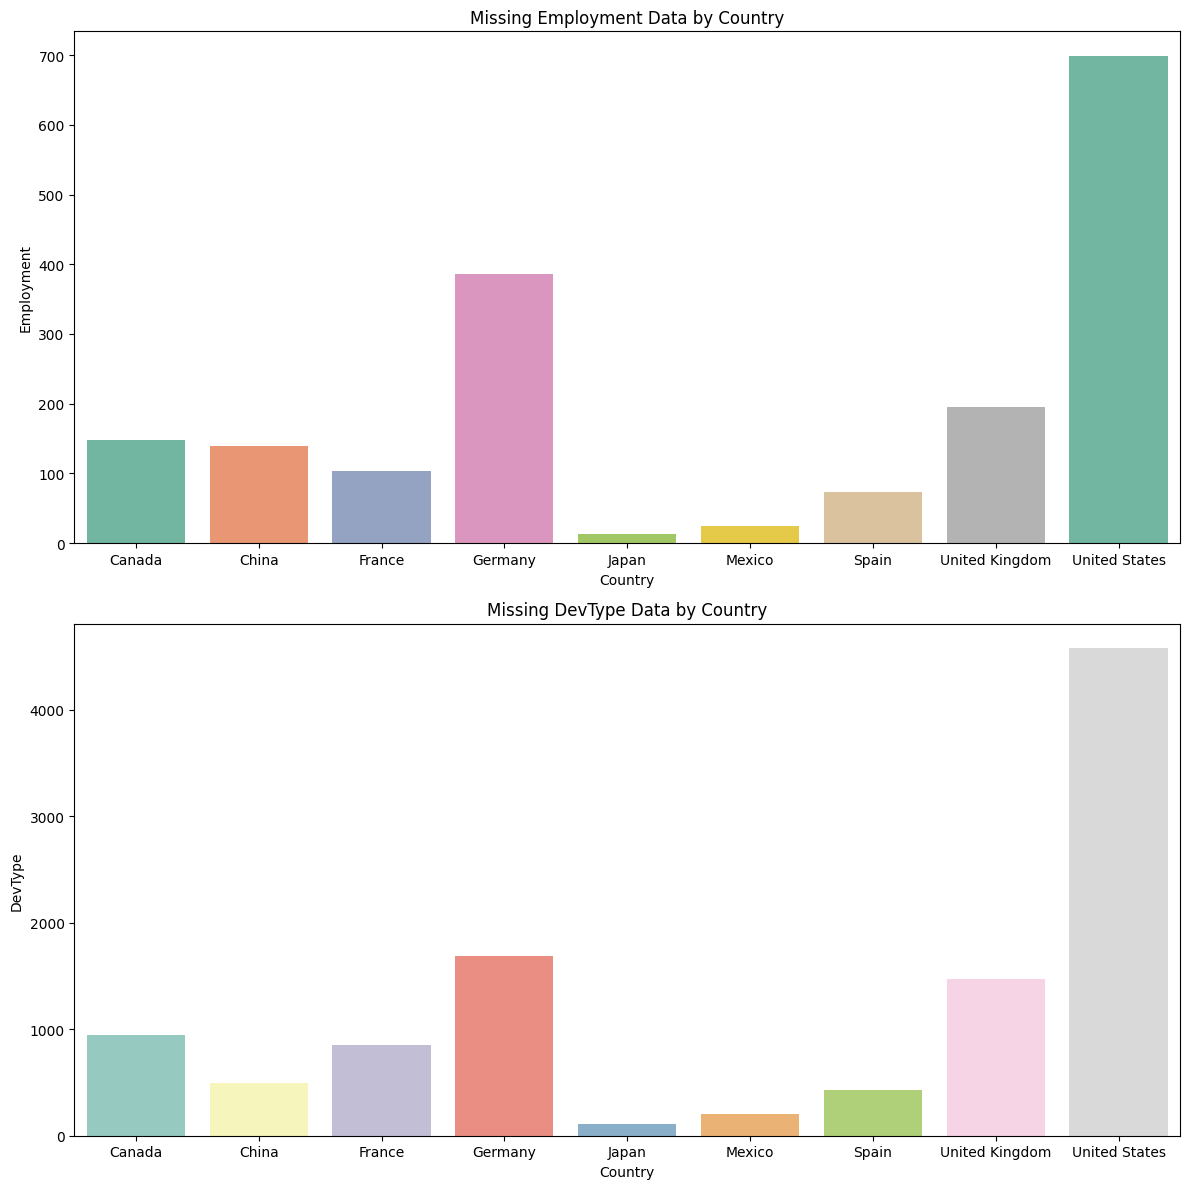

In [71]:
# creating a barplots for missing data in 'Employment' and 'DevType' columns
plt.figure(figsize=(12, 12))

plt.subplot(2, 1, 1)
sns.barplot(data=missingData, x="Country", y="Employment", hue='Country', palette='Set2')
plt.title('Missing Employment Data by Country')

plt.subplot(2, 1, 2)
sns.barplot(data=missingData, x="Country", y="DevType", hue='Country', palette='Set3')
plt.title('Missing DevType Data by Country')

plt.tight_layout()
plt.show()

In [ ]:
# delete rows that have missing data for either Employment or DevType
df.dropna(subset=['Employment', 'DevType'], inplace=True, how='any')

Aggregate the employment data by key developer roles that align with major parts of the development lifecycle:

- Front-end
- Back-end
- Full-stack
- Mobile development
- Administration roles

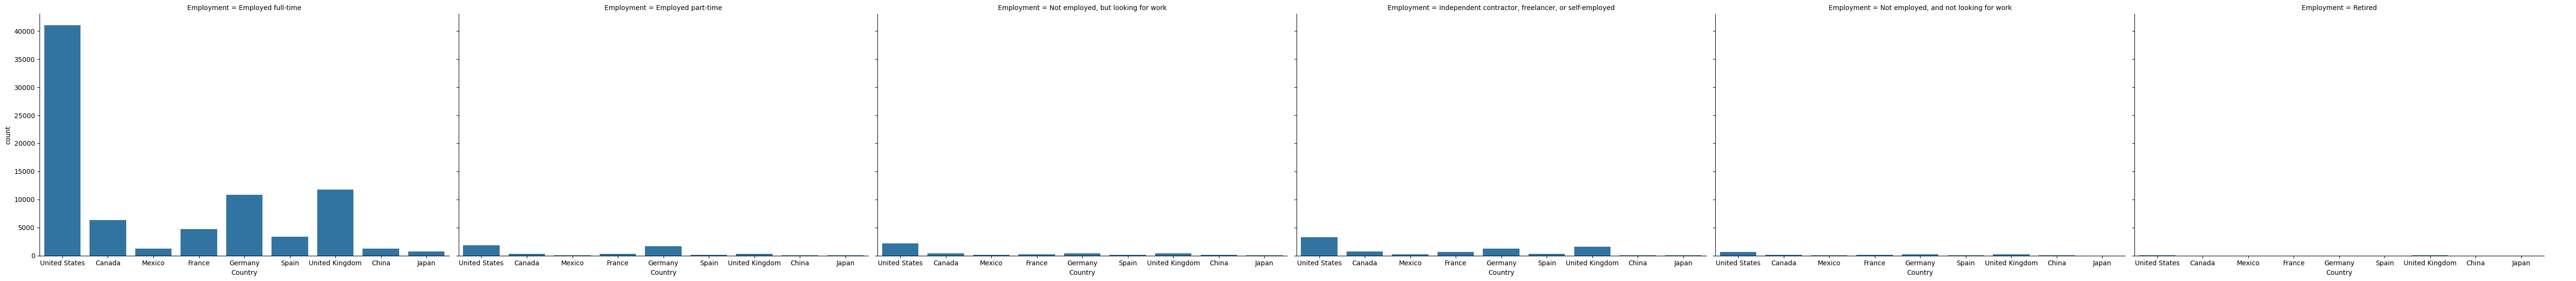

In [78]:
empfig = sns.catplot(x="Country", col="Employment", data=df, kind="count", height=6, aspect=1.5)